
# Neighbors Functional Regression

Shows the usage of the nearest neighbors regressor with functional response.


In [1]:
# Author: Pablo Marcos Manchón
# License: MIT

# sphinx_gallery_thumbnail_number = 4

from sklearn.model_selection import train_test_split

import skfda
from skfda.ml.regression import KNeighborsRegressor
from skfda.representation.basis import FourierBasis

In this example we are going to show the usage of the nearest neighbors
regressors with functional response. There is available a K-nn version,
:class:`~skfda.ml.regression.KNeighborsRegressor`, and other one based in
the radius, :class:`~skfda.ml.regression.RadiusNeighborsRegressor`.


As in the `scalar response example
<sphx_glr_auto_examples_plot_neighbors_scalar_regression.py>`, we will fetch
the Canadian weather dataset, which contains the daily temperature and
precipitation at 35 different locations in Canada averaged over 1960 to 1994.
The following figure shows the different temperature and precipitation
curves.



In [2]:
data = skfda.datasets.fetch_weather()
fd = data['data']


# Split dataset, temperatures and curves of precipitation
X, y = fd.coordinates

Temperatures



In [11]:
print(type(fd))

<class 'skfda.representation.grid.FDataGrid'>


In [17]:
print(len(fd.grid_points))
print(len(fd.data_matrix[0]))

1
365


In [18]:
print(type(fd))                 # skfda.representation.grid.FDataGrid
print(fd.n_samples)
print(fd.dim_domain, fd.dim_codomain)
print(fd.domain_range)          # e.g., ((0.0, 365.0),)
print(len(fd.grid_points[0]))   # number of time points
print(fd.data_matrix.shape)     # raw tensor shape

<class 'skfda.representation.grid.FDataGrid'>
35
1 2
((0.0, 365.0),)
365
(35, 365, 2)


In [21]:
fd0 = fd[0]               # first curve (still an FDataGrid with 1 sample)
fd_first5 = fd[:5]        # first five curves
yvals_first = fd.data_matrix[0]          # numpy array of y on the grid
xgrid = fd.grid_points[0]                # numpy array of x grid

In [22]:
import numpy as np
fd_interp = fd        # FDataGrid supports evaluation with interpolation
new_x = np.array([10.0, 100.0, 200.0])   # domain units (e.g., day index)
vals = fd_interp(new_x)                  # shape: (n_samples, len(new_x), dim_codomain)

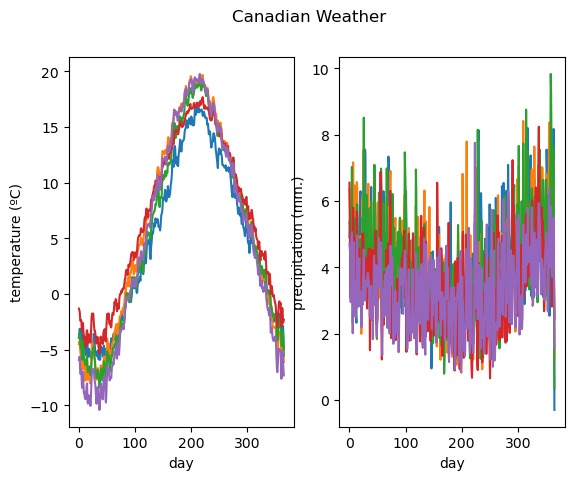

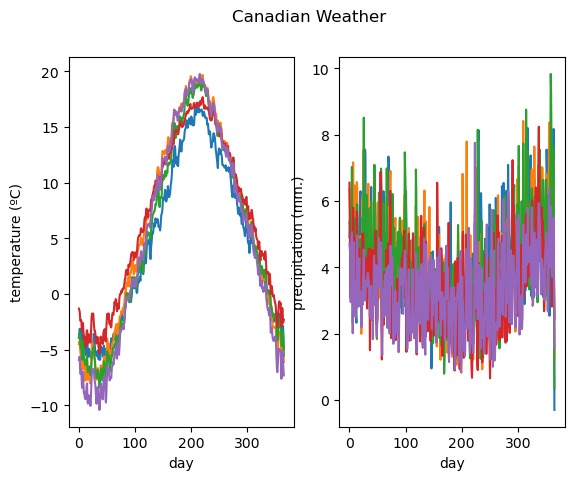

In [23]:
fd[:5].plot()          # plot first 5 curves

In [20]:
print("Data Matrix:", fd.data_matrix[0])
# print("Grid Points:", fd.grid_points)

Data Matrix: [[-3.6  5.2]
 [-3.1  5.8]
 [-3.4  3.9]
 [-4.4  4.3]
 [-2.9  6.2]
 [-4.5  3.4]
 [-5.5  3.7]
 [-3.1  7.1]
 [-4.   4.9]
 [-5.   3.6]
 [-4.8  4.2]
 [-5.2  2.6]
 [-5.5  2.3]
 [-5.4  4.9]
 [-4.4  4.4]
 [-4.6  3.4]
 [-5.9  5.1]
 [-5.   3.4]
 [-4.9  5.8]
 [-5.2  6.5]
 [-5.3  5.5]
 [-5.9  2.5]
 [-5.7  4.4]
 [-5.   4. ]
 [-4.5  2.8]
 [-4.5  4.8]
 [-3.3  6.1]
 [-4.1  7.6]
 [-4.7  7.4]
 [-5.5  3.4]
 [-5.4  5. ]
 [-5.5  5.5]
 [-5.6  3.3]
 [-5.   4.7]
 [-5.8  4.1]
 [-5.9  5. ]
 [-5.4  5.8]
 [-6.1  3.7]
 [-5.6  6.8]
 [-4.6  4.8]
 [-5.1  4.4]
 [-4.8  4.4]
 [-5.1  3.5]
 [-6.   4.4]
 [-4.6  6.9]
 [-5.3  5.7]
 [-4.6  5.9]
 [-6.   3.9]
 [-7.   2.3]
 [-6.5  2.3]
 [-5.1  4.1]
 [-5.2  3.7]
 [-5.2  5.5]
 [-4.4  5.1]
 [-6.2  4. ]
 [-5.8  5.1]
 [-4.5  7.7]
 [-3.9  4.6]
 [-4.3  5.4]
 [-4.2  5.9]
 [-4.   6.3]
 [-3.5  6.2]
 [-3.6  5. ]
 [-3.5  3.6]
 [-4.1  3.4]
 [-4.1  2.7]
 [-3.   5.1]
 [-3.5  2.1]
 [-4.8  3. ]
 [-3.9  8.1]
 [-3.4  6.5]
 [-4.2  2.8]
 [-4.   3.2]
 [-3.6  4. ]
 [-2.2  5.8]
 [-1.5  4.2]

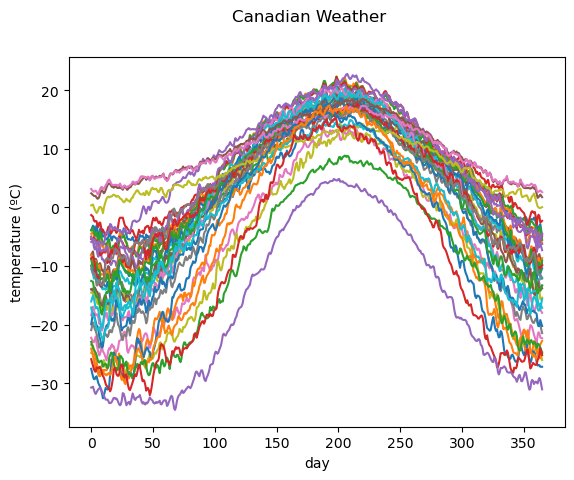

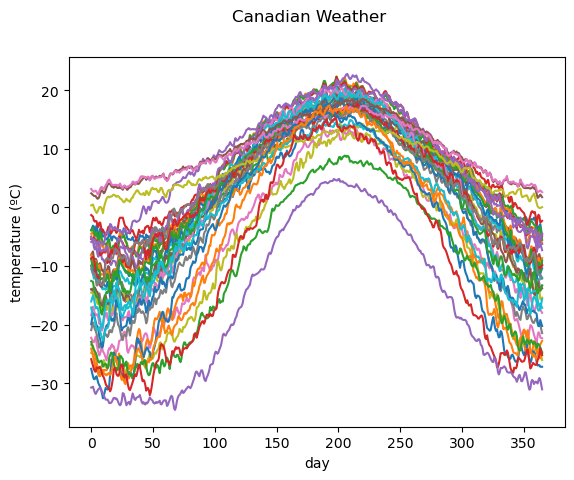

In [3]:
X.plot()

Precipitation



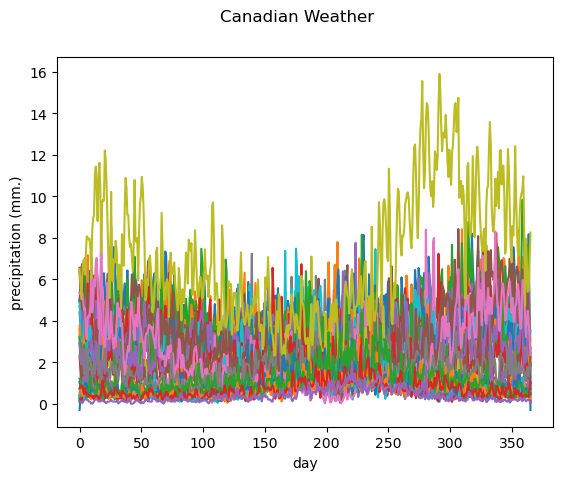

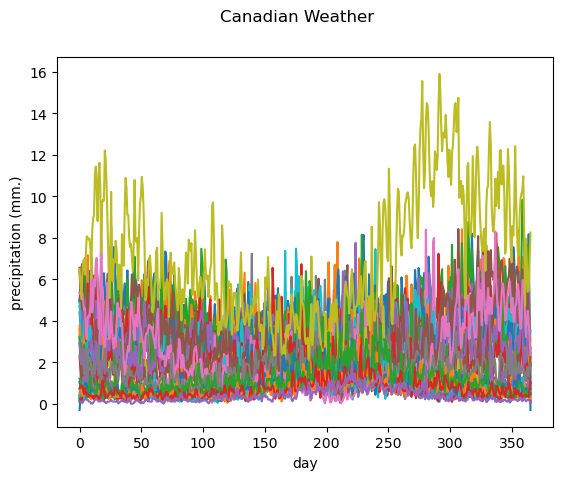

In [4]:
y.plot()

We will try to predict the precipitation curves. First of all we are going
to make a smoothing of the precipitation curves using a basis
representation, employing for it a fourier basis with 5 elements.



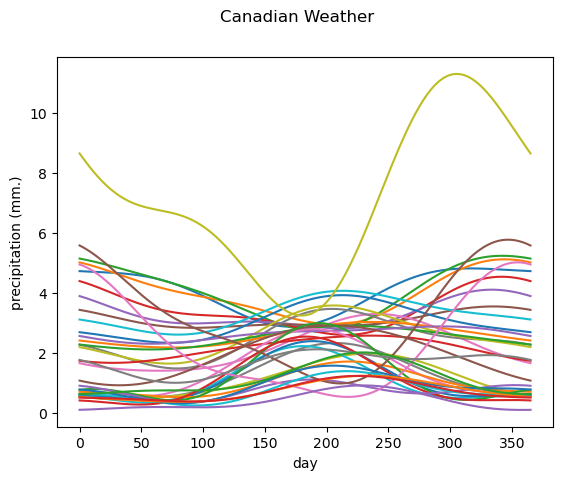

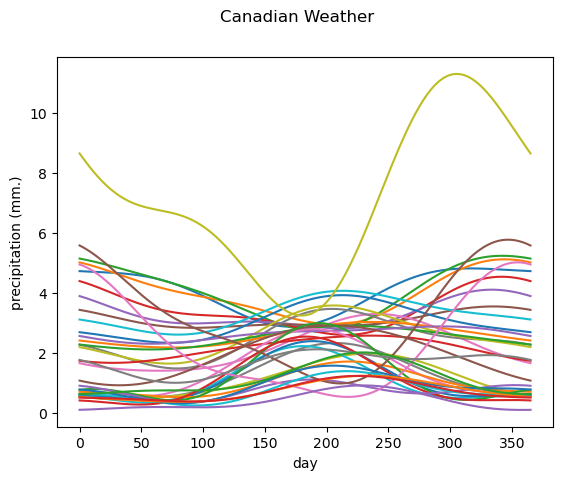

In [5]:
y = y.to_basis(FourierBasis(n_basis=5))

y.plot()

We will split the dataset in two partitions, for training and test,
using the sklearn function
:func:`~sklearn.model_selection.train_test_split`.



In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=28,
)

We will try make a prediction using 5 neighbors and the $\mathbb{L}^2$
distance. In this case, to calculate
the response we will use a mean of the response, weighted by their distance
to the test sample.



In [7]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,metric,LpDistance(p=...tor_norm=None)
,n_jobs,None


We can predict values for the test partition using
:meth:`~skfda.ml.regression.KNeighborsFunctionalRegressor.predict`. The
following figure shows the real precipitation curves, in dashed line, and
the predicted ones.



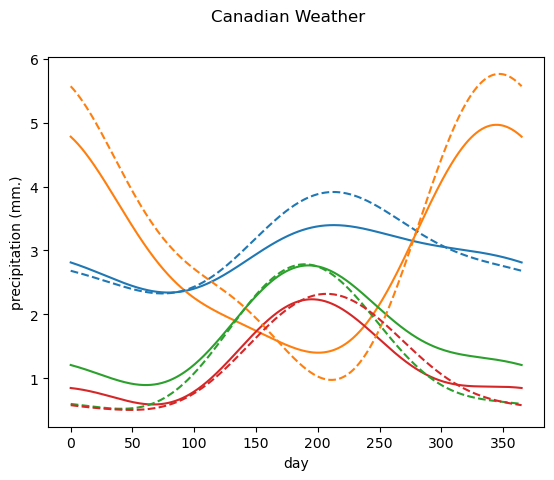

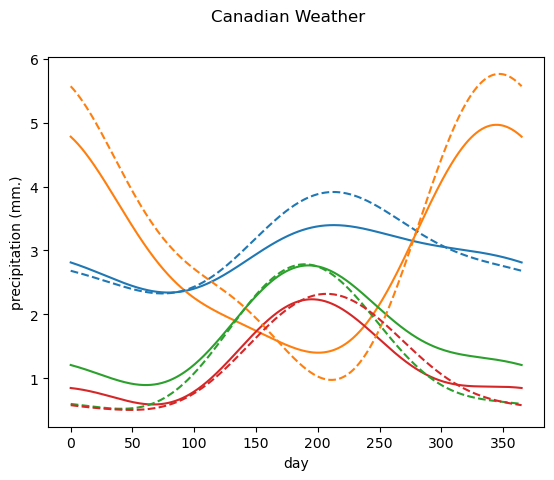

In [8]:
y_pred = knn.predict(X_test)

# Plot prediction
fig = y_pred.plot()
fig.axes[0].set_prop_cycle(None)  # Reset colors
y_test.plot(fig=fig, linestyle='--')

We can quantify how much variability it is explained by the model
using the
:meth:`~skfda.ml.regression.KNeighborsFunctionalRegressor.score` method,
which computes the value

\begin{align}1 - \frac{\sum_{i=1}^{n}\int (y_i(t) - \hat{y}_i(t))^2dt}
   {\sum_{i=1}^{n} \int (y_i(t)- \frac{1}{n}\sum_{i=1}^{n}y_i(t))^2dt}\end{align}

where $y_i$ are the real responses and $\hat{y}_i$ the
predicted ones.



In [9]:
score = knn.score(X_test, y_test)
print(score)

0.9149923776656348


More detailed information about the canadian weather dataset can be obtained
in the following references.

 * Ramsay, James O., and Silverman, Bernard W. (2006). Functional Data
   Analysis, 2nd ed. , Springer, New York.

 * Ramsay, James O., and Silverman, Bernard W. (2002). Applied Functional
   Data Analysis, Springer, New York\n'

